# Aprendizaje Supervisado

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descarga-y-prepara-los-datos." data-toc-modified-id="Descarga-y-prepara-los-datos.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descarga y prepara los datos.</a></span><ul class="toc-item"><li><span><a href="#Valores-ausentes" data-toc-modified-id="Valores-ausentes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Valores ausentes</a></span></li><li><span><a href="#Eliminar-datos" data-toc-modified-id="Eliminar-datos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Eliminar datos</a></span></li></ul></li><li><span><a href="#Examina-el-equilibrio-de-clases." data-toc-modified-id="Examina-el-equilibrio-de-clases.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examina el equilibrio de clases.</a></span></li><li><span><a href="#Entrenamos-el-modelo-sin-equilobrio-de-clases" data-toc-modified-id="Entrenamos-el-modelo-sin-equilobrio-de-clases-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Entrenamos el modelo sin equilobrio de clases</a></span></li><li><span><a href="#Mejora-la-calidad-del-modelo." data-toc-modified-id="Mejora-la-calidad-del-modelo.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mejora la calidad del modelo.</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Aplicaremos-la-muestra-de-Sobremuestro,-submuestreo-y-AUC-ROC,-para-intentar-aumentar-el-valor-de-F1" data-toc-modified-id="Aplicaremos-la-muestra-de-Sobremuestro,-submuestreo-y-AUC-ROC,-para-intentar-aumentar-el-valor-de-F1-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Aplicaremos la muestra de Sobremuestro, submuestreo y AUC-ROC, para intentar aumentar el valor de F1</a></span><ul class="toc-item"><li><span><a href="#Sobremuestreo" data-toc-modified-id="Sobremuestreo-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Sobremuestreo</a></span></li><li><span><a href="#Submuestro" data-toc-modified-id="Submuestro-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Submuestro</a></span></li></ul></li></ul></li><li><span><a href="#Realiza-la-prueba-final" data-toc-modified-id="Realiza-la-prueba-final-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Realiza la prueba final</a></span></li></ul></div>

## Descarga y prepara los datos.

In [1]:
#Importar bibliotecas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score  
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier  
from sklearn.utils import shuffle

In [2]:
# Carga el archivo de datos en un DataFrame
try:
    df = pd.read_csv('Churn.csv')
except: 
    df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Descripción de los datos**

- RowNumber: índice de cadena de datos
- CustomerId: identificador de cliente único
- Surname: apellido
- CreditScore: valor de crédito
- Geography: país de residencia
- Gender: sexo
- Age: edad
- Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- Balance: saldo de la cuenta
- NumOfProducts: número de productos bancarios utilizados por el cliente
- HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- IsActiveMember: actividad del cliente (1 - sí; 0 - no)
- EstimatedSalary: salario estimado

### Valores ausentes

In [4]:
df['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

En la columna de `Tenure`, hay valores ausentes, estos valores los sustituiremos por la mediana 

In [5]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


### Eliminar datos

+ Las columnas `RowNumber`, `CustomerId`, `Surname`, no son relevantes y no aportan informacion para el modelo, en este caso las eliminaremos para que nuestro modelo trabaje mejor 

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


## Examina el equilibrio de clases.

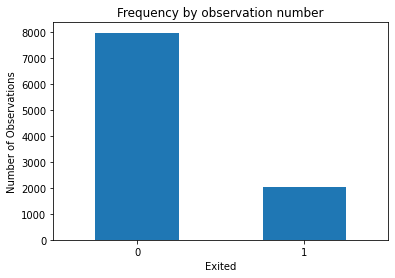

In [7]:
count_classes = pd.value_counts(df['Exited'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frequency by observation number")
plt.xlabel("Exited")
plt.ylabel("Number of Observations")
plt.show()


In [8]:
df.value_counts('Gender')

Gender
Male      5457
Female    4543
dtype: int64

In [9]:
df.value_counts('Geography')

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64

Podemos observar que las columnas `Gender` y `Geography` hay que transformarlas características categóricas en numéricas

In [10]:
df_ohe = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True)
print(df_ohe.shape)
print(pd.value_counts(df_ohe['Exited'], sort = True))
print(len(df_ohe[df_ohe['Exited']==1]) / len(df_ohe) * 100)

(10000, 12)
0    7963
1    2037
Name: Exited, dtype: int64
20.369999999999997


Podemos observar que solo el 20% representa la clase minotaria de la muestra

In [11]:
# #Seleccionamos las columnas de objetivo y las caracteristicas 
features = df_ohe.drop('Exited', axis = 1)
target = df_ohe['Exited']

In [12]:
#Segmentamos los datos en 3:1:1
#Segmentamos los datos para entrenamiento y validación
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.40, random_state=12345)
#Segmentamos los datos para validación y prueba
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.50, random_state=12345)

In [13]:
#Estandarizamos las funciones para facilitar que los algoritmos entrenen modelos.
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric]) 

/tmp/ipykernel_74/537833299.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [14]:
#Comprobamos la distribucón 
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


## Entrenamos el modelo sin equilobrio de clases

In [15]:
#Entrenando al modelo sin el equilibrio de clases

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)
class_frequency = pd.Series(model.predict(features_valid)).value_counts(normalize=True)

#Modelo constante
target_pred_constant = pd.Series(0, index=target_valid.index)

print(class_frequency)
print('Exactitud modelo constante:', accuracy_score(target_valid, target_pred_constant))
print('Exactitud modelo:',accuracy_valid)
print('Matriz de confucion:')
print(confusion_matrix(target_valid, predicted_valid))
print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision' ,precision_score(target_valid, predicted_valid))
print('F1:' ,f1_score(target_valid, predicted_valid))

0    0.7915
1    0.2085
dtype: float64
Exactitud modelo constante: 0.791
Exactitud modelo: 0.7845
Matriz de confucion:
[[1367  215]
 [ 216  202]]
Recall: 0.48325358851674644
Precision 0.4844124700239808
F1: 0.4838323353293413


+ La exactitud del árbol de decisión es casi la misma que la del modelo constante. Hay un fuerte desequilibrio de clases en nuestros datos.
+ Nuestro modelo tiene mayor numero de respuestas VN, 216 fallos frente a 202 aciertos
+ Un recall de 0.48 y una precision de 0.48, esto es por que el numero de fallos y aciertos es muy parecido
+ el valor F1 es la media armonica de recall y precision, que no es muy bajo, pero no es el objetivo 

## Mejora la calidad del modelo.

Utilizaremos un parámetro adicional en el modelo de Regresión logística en donde indicamos weight = “balanced” y con esto el algoritmo se encargará de equilibrar a la clase minoritaria durante el entrenamiento.

### Decision Tree Classifier

In [16]:
for depth in range(1, 6):
        model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', max_depth=depth) 

        model.fit(features_train, target_train)

        predicted_valid = model.predict(features_valid)

        print("max_depth =", depth, ": ", end='')
        
        print(f1_score(target_valid, predicted_valid)) 

max_depth = 1 : 0.4994903160040775
max_depth = 2 : 0.541015625
max_depth = 3 : 0.541015625
max_depth = 4 : 0.5277777777777778
max_depth = 5 : 0.5963791267305644


El mejor valor de F1 para nuestro modelo de arbol de decision es 0.59 con un max_depth de 5

### Random Forest Classifier

In [17]:
best_score = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=est, max_depth=depth)  
        model.fit(features_train,target_train)
        predicted_valid= model.predict(features_valid)
        score = f1_score(target_valid, predicted_valid)
        
        if score > best_score:
            best_score = score 
            best_est = est  
            best_depth = depth

print("Exactitud del mejor modelo en el conjunto de validación (n_estimators = {}, max_depth={}): {}".format(best_est, best_depth, best_score))

Exactitud del mejor modelo en el conjunto de validación (n_estimators = 40, max_depth=8): 0.6260869565217393


El mejor valor de F1 para nuestro modelo Random Forest Classifier es 0.63, n_estimators = 40, max_depth=7

+ Usaremos el modelo de Random Forest Classifier, ya que nos da el mejor valor de F1

### Aplicaremos la muestra de Sobremuestro, submuestreo y AUC-ROC, para intentar aumentar el valor de F1

#### Sobremuestreo

In [18]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [19]:
best_score = 0
best_est = 0
best_depth = 0
auc_score = 0

for est in range(10,51,10):
    for depth in range(1,11):
        model_upsampled= RandomForestClassifier(random_state=12345, n_estimators=est,  max_depth=depth )
        
        model_upsampled.fit(features_upsampled, target_upsampled)
        predicted_valid= model_upsampled.predict(features_valid)
        probabilities_valid = model_upsampled.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]

        score = f1_score(target_valid, predicted_valid)
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
        if score > best_score:
            best_score = score
            best_est = est
            best_depth = depth
            auc_score = auc_roc
            
print('Bosque aleatorio con sobremuerteo (n_estimators = {}, max_depth= {}) | F1= {:.6f}, AUC-ROC = {:.6f}'.format(best_est, best_depth, best_score, auc_score))            

Bosque aleatorio con sobremuerteo (n_estimators = 40, max_depth= 9) | F1= 0.619895, AUC-ROC = 0.850182


El valor de F1 aumento a 0.619 con un modelo Random Forest Classifier con n_estimators = 40, max_depth= 9, AUC-ROC es mayor a 0.5

#### Submuestro

In [20]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

In [21]:
best_score = 0
best_est = 0
best_depth = 0
auc_score = 0

for est in range(10,51,10):
    for depth in range(1,11):
        model_downsampled= RandomForestClassifier(random_state=12345, n_estimators=est,  max_depth=depth )
        
        model_downsampled.fit(features_downsampled, target_downsampled)
        predicted_valid= model_downsampled.predict(features_valid)
        probabilities_valid = model_downsampled.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]

        score = f1_score(target_valid, predicted_valid)
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
        if score > best_score:
            best_score = score
            best_est = est
            best_depth = depth
            auc_score = auc_roc
            
print('Bosque aleatorio con sobremuerteo (n_estimators = {}, max_depth= {}) | F1= {:.6f}, AUC-ROC = {:.6f}'.format(best_est, best_depth, best_score, auc_score))  

Bosque aleatorio con sobremuerteo (n_estimators = 20, max_depth= 10) | F1= 0.470366, AUC-ROC = 0.821391


El valor de F1 disminuyo a 0.47 con un modelo Random Forest Classifier con n_estimators = 20, max_depth= 10, AUC-ROC es mayor a 0.5, F1 es menor que nuestro objetivo

**El mejor modelo**

El sobremuestreo con un modelo Random Forest Classifier con n_estimators = 40, max_depth= 9, aumento el valor de F1 a 0.62 con un AUC-ROC es mayor a 0.5, muy por encima del valor de 0.5 de un modelo aleatorio

## Realiza la prueba final

In [22]:
final_model= RandomForestClassifier(random_state=12345, n_estimators=50,  max_depth=10 )
final_model.fit(features_upsampled, target_upsampled)
predicted_test= final_model.predict(features_test)
probabilities_valid = final_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid))
print('F1:', f1_score(target_test, predicted_test))

ROC-AUC: 0.8519302076591317
F1: 0.6175213675213675
